<a href="https://colab.research.google.com/github/dayanamariyathomas/Dayana_portfolio/blob/main/DayanaThomas_unsupervsd_asgnmt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.svm import SVC 
from sklearn import metrics
from sklearn.model_selection import train_test_split,ShuffleSplit
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import silhouette_score

#import visuals.py 
#import visuals as vp
#import properties_1 as ps
sns.set_style('whitegrid')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from itertools import chain

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Wine_clust.csv")
df.tail()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [ ]:
df.shape

(178, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [ ]:
# there are no null values and no numerical columns!

In [ ]:
df.shape

(178, 13)

In [ ]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [ ]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
corrmatrix=df.corr()
corrmatrix

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


<Axes: >

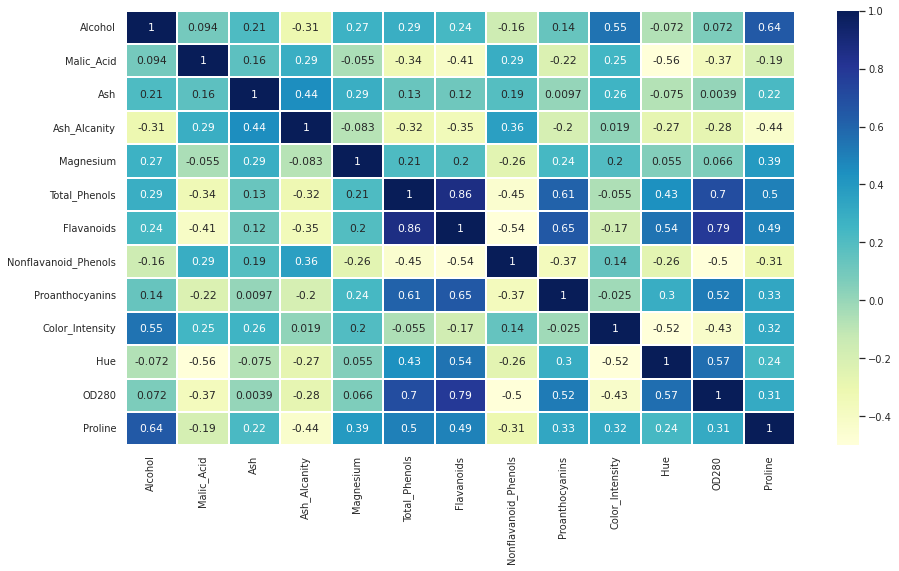

In [ ]:
plt.subplots(figsize=(15,8))
sns.heatmap(corrmatrix,annot=True,vmin=-0.5,vmax=1,linewidth=0.2,
            cmap='YlGnBu')

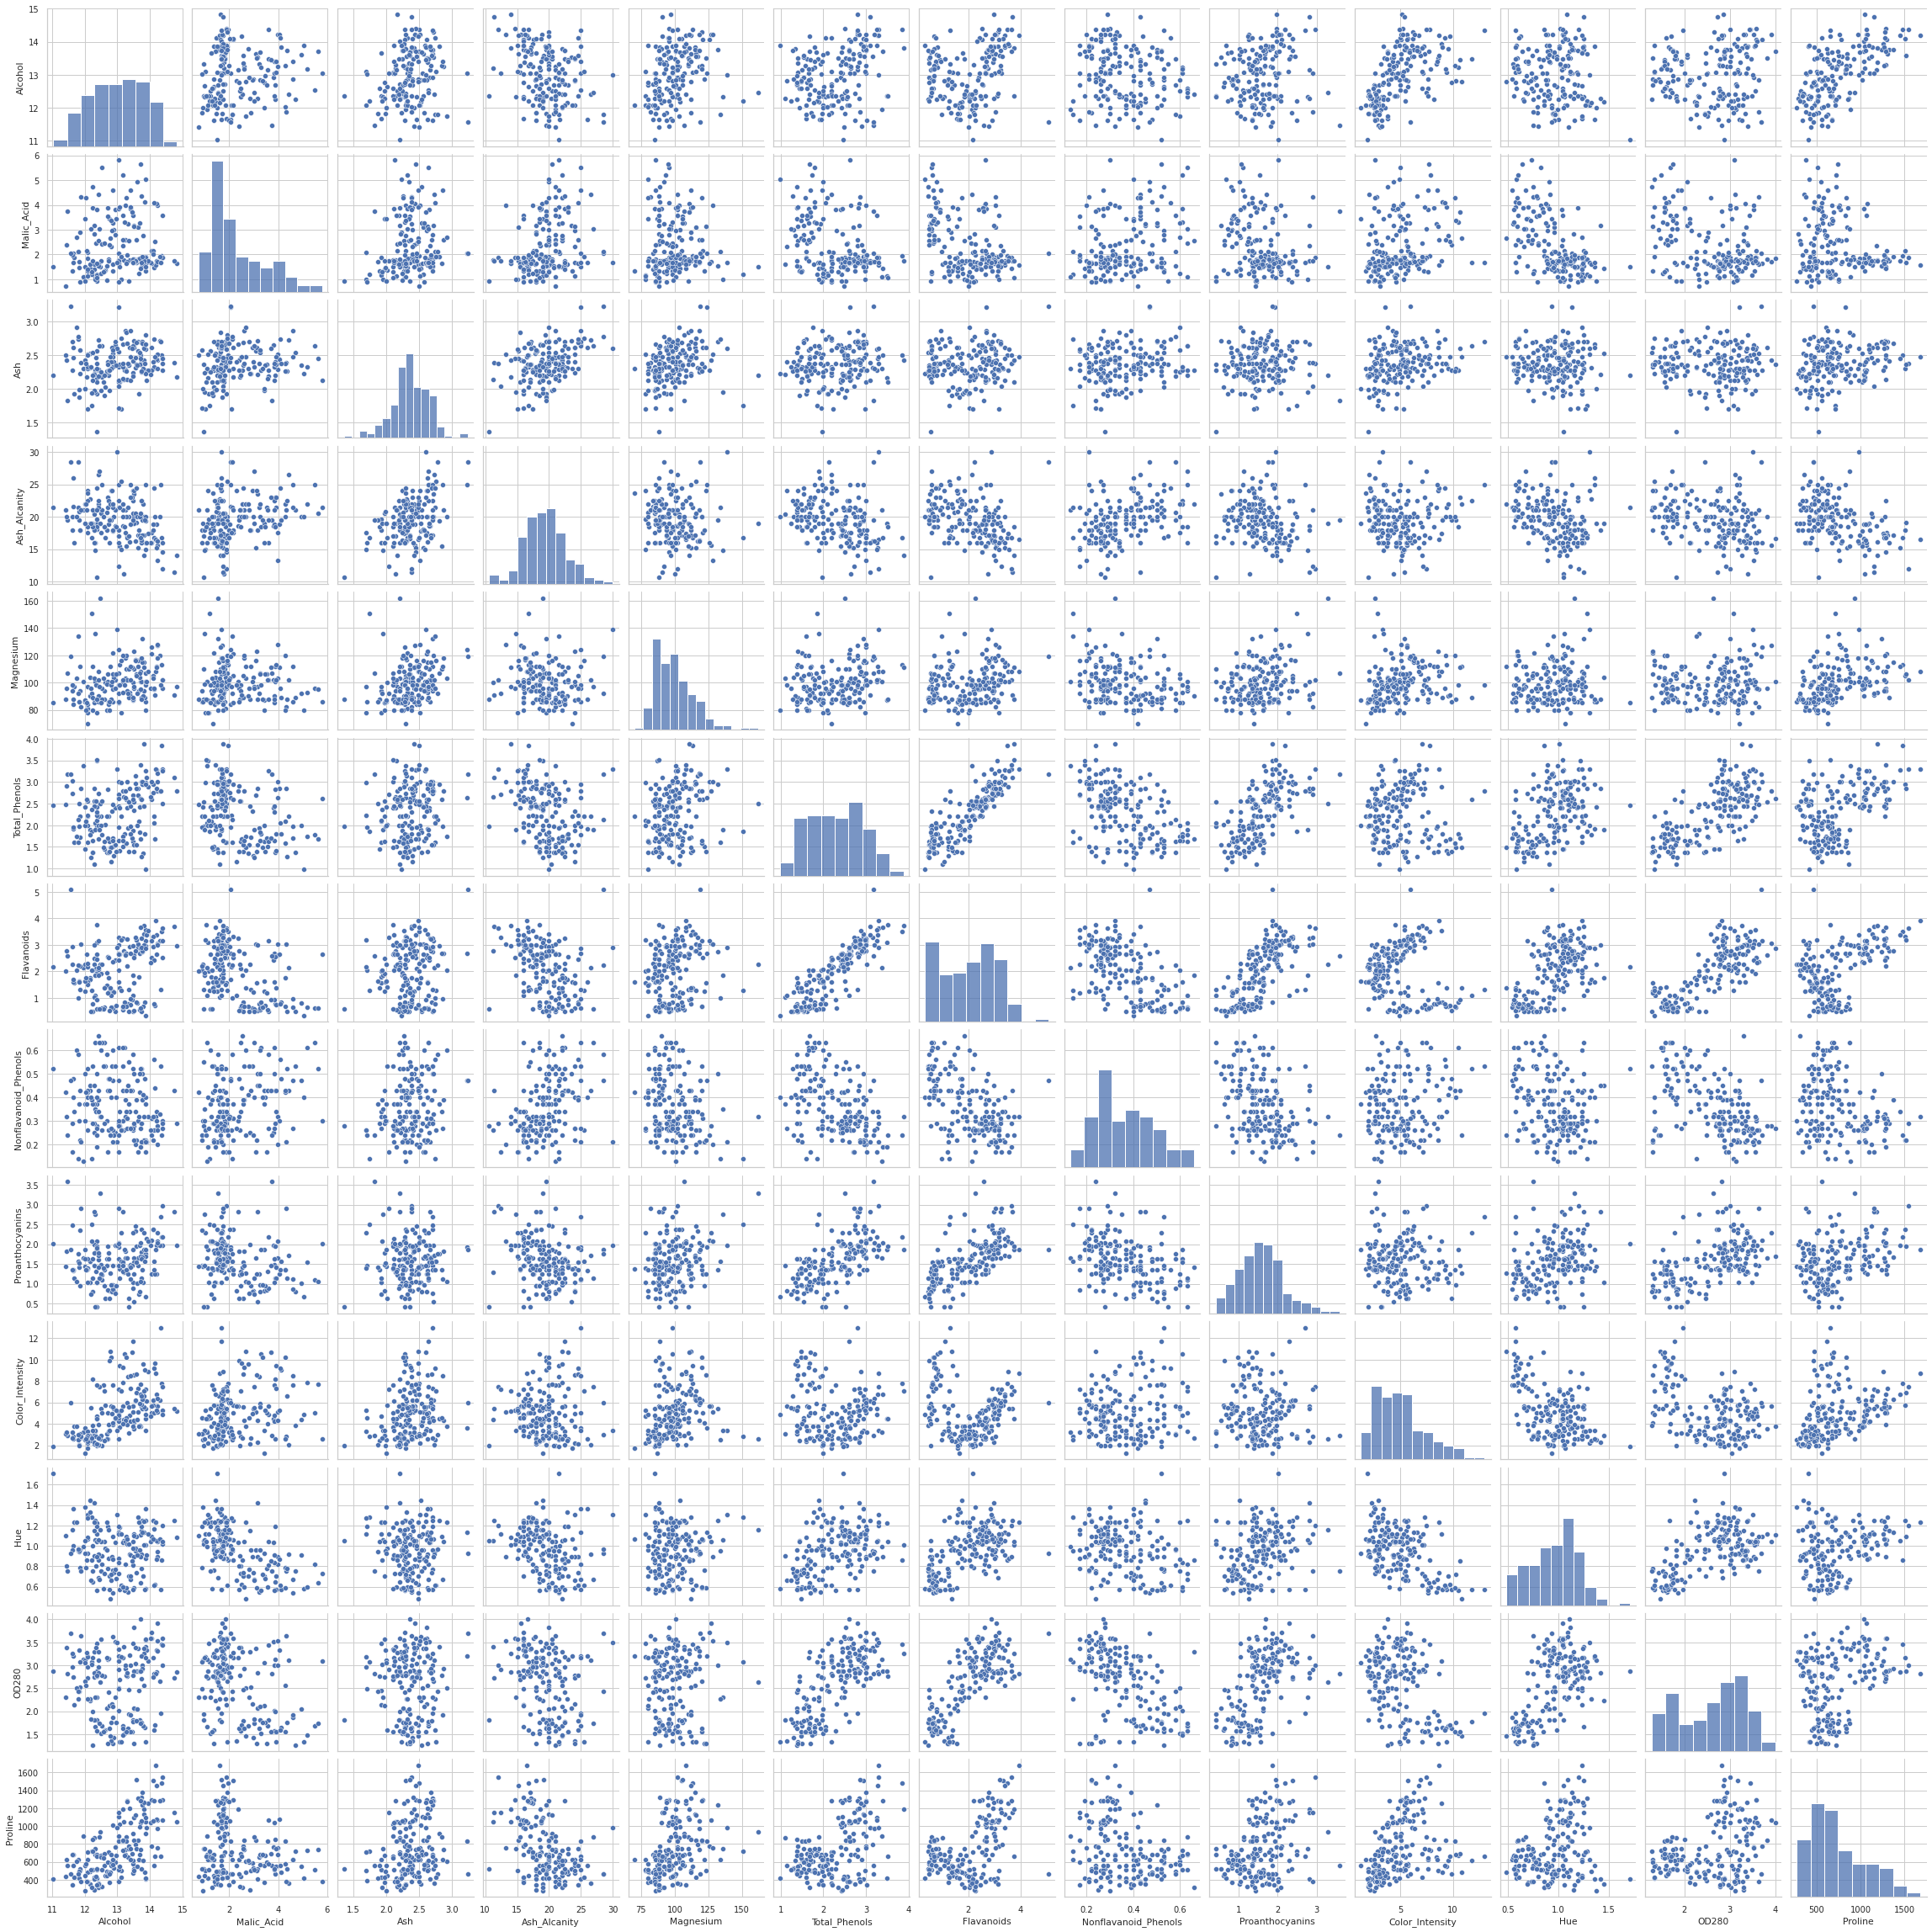

In [ ]:
#visualising the data in a 2d scatter plot
sns.pairplot(df)

In [ ]:
# there are linearly distributed data and negatively skewed data
#we need to find the outliers from the data

Outlier Detection

Alcohol                     Axes(0.125,0.71587;0.168478x0.16413)
Malic_Acid               Axes(0.327174,0.71587;0.168478x0.16413)
Ash                      Axes(0.529348,0.71587;0.168478x0.16413)
Ash_Alcanity             Axes(0.731522,0.71587;0.168478x0.16413)
Magnesium                  Axes(0.125,0.518913;0.168478x0.16413)
Total_Phenols           Axes(0.327174,0.518913;0.168478x0.16413)
Flavanoids              Axes(0.529348,0.518913;0.168478x0.16413)
Nonflavanoid_Phenols    Axes(0.731522,0.518913;0.168478x0.16413)
Proanthocyanins            Axes(0.125,0.321957;0.168478x0.16413)
Color_Intensity         Axes(0.327174,0.321957;0.168478x0.16413)
Hue                     Axes(0.529348,0.321957;0.168478x0.16413)
OD280                   Axes(0.731522,0.321957;0.168478x0.16413)
Proline                       Axes(0.125,0.125;0.168478x0.16413)
dtype: object

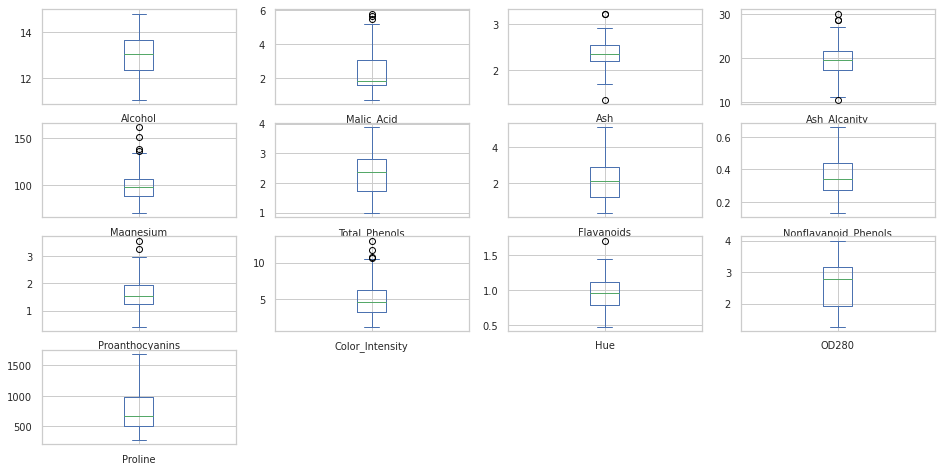

In [ ]:

df.plot(kind ='box',subplots = True, layout =(4,4),sharex = False)

<Axes: >

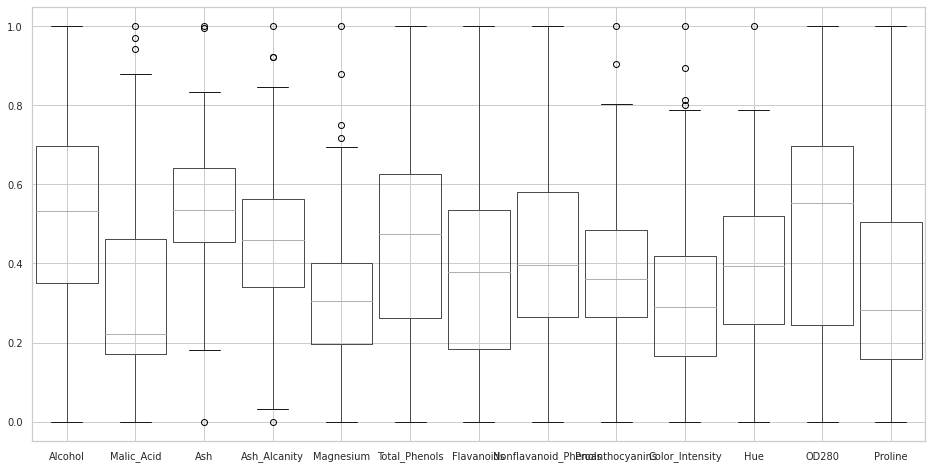

In [ ]:
#In this dataset, the features have different ranges 
#and units of measurement, so normalizing the data using 
#MinMaxScaler can help ensure that each feature contributes 
#equally to the clustering analysis.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df) 
df.loc[:,:] = scaled_values

sns.set(rc={'figure.figsize':(16,8)}, font_scale=0.9, style='whitegrid')
df.boxplot(widths = 0.9)

In [ ]:
def IQR_OutlierRemoval(new_df):  
    Q1 = new_df.quantile(0.25)
    Q3 = new_df.quantile(0.75)
    IQR = Q3 - Q1

    new_df = new_df[~((new_df < (Q1 - 1.5 * IQR)) |(new_df > (Q3 + 1.5 * IQR))).any(axis=1)]

    return new_df
    # plt.show()

df2 = df.copy()

print(df2.shape)

(178, 13)


In [ ]:
df2 = IQR_OutlierRemoval(df2) #outlier removal
df2.shape

(161, 13)

<Axes: >

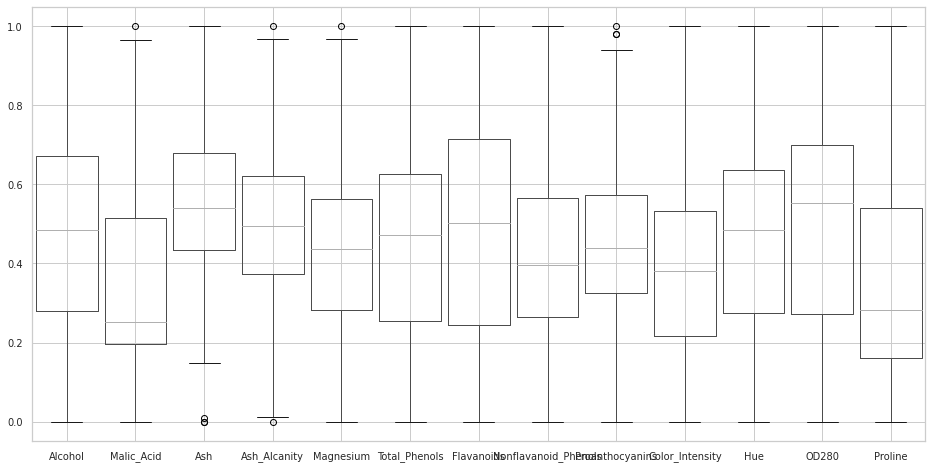

In [ ]:
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df2) 
df2.loc[:,:] = scaled_values

sns.set(rc={'figure.figsize':(16,8)}, font_scale=0.9, style='whitegrid')
df2.boxplot(widths = 0.9)

In [ ]:
#locating the data by converting it to numpy arrays and splitting the data
df2.iloc[:, 0].values
X, y = df2.iloc[:, 1:].values, df2.iloc[:, 0].values
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# Normalising the data of each feature column
# Minmaxscaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [ ]:
#StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [ ]:
#Now that we have adjusted these parameters to 
#obtain more reasonable clustering results, we can perform diff clustering
#methods

Kmeans Clustering

In [ ]:
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
kmeans_sil_score = [] # silhouette scores

for n in n_clusters:
    kmeans = KMeans(n_clusters=n, init='k-means++').fit(X_train_std)
    clusters_inertia.append(kmeans.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(X_train_std, kmeans.labels_)
    kmeans_sil_score.append(silhouette_avg) # data for the silhouette score method

print(kmeans_sil_score)

[0.31504412213688404, 0.3001258968804734, 0.2408721714718128, 0.21921917087828174, 0.22169410962134384, 0.13762730813153376, 0.16185540995169717, 0.15758682866428106, 0.16183792514683315]


In [ ]:
clusters_inertia

[881.9732644024047,
 663.1257898854594,
 605.8451352634488,
 562.2271736591404,
 533.1162754943778,
 504.23231964984575,
 470.0645417496845,
 452.1327769971572,
 425.2831722424313]

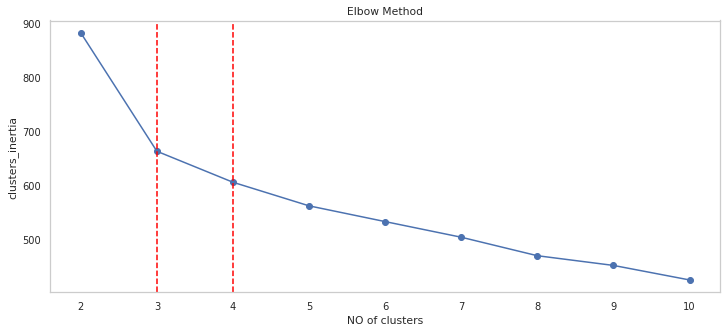

In [ ]:
#finding the optimum no of clusters using elbow method
plt.subplots(figsize=(12,5))
plt.plot(n_clusters,clusters_inertia,marker='o')
plt.title('Elbow Method')
plt.xlabel('NO of clusters')
plt.ylabel('clusters_inertia')
plt.axvline(3, ls="--", c="red")
plt.axvline(4, ls="--", c="red")
plt.grid()
plt.show()

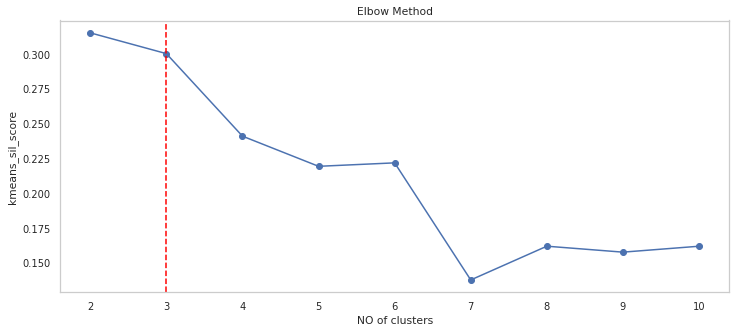

In [ ]:
#finding the optimum no of clusters using elbow method
plt.subplots(figsize=(12,5))
plt.plot(n_clusters,kmeans_sil_score,marker='o')
plt.title('Elbow Method')
plt.xlabel('NO of clusters')
plt.ylabel('kmeans_sil_score')
plt.axvline(3, ls="--", c="red")
plt.grid()
plt.show()

In [ ]:
# optimum no of clusters = 3
# so we are applying it
kmeans3=KMeans(n_clusters=3, init='k-means++',random_state=42)
df2['Cluster']=kmeans3.fit_predict(df2)
kmeans3_new=df2.copy()

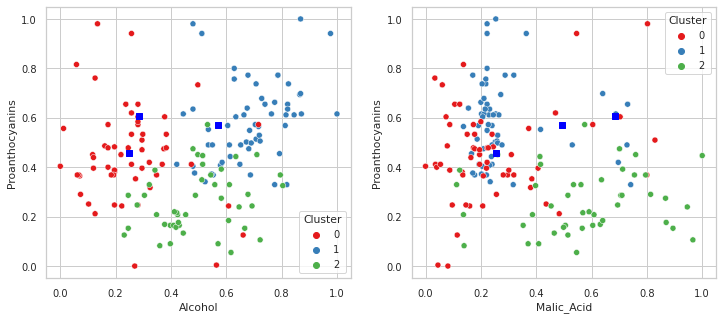

In [ ]:
fig1, (axes) = plt.subplots(1,2,figsize=(12,5))


scat_1 = sns.scatterplot( data=kmeans3_new,x='Alcohol', y='Proanthocyanins', hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot(x='Malic_Acid', y='Proanthocyanins', data=kmeans3_new,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(kmeans3.cluster_centers_[:,1],kmeans3.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(kmeans3.cluster_centers_[:,0],kmeans3.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

In [ ]:

KM_clust_sizes = kmeans3_new.groupby('Cluster').size().to_frame()
KM_clust_sizes.columns = ["KM_size = 3"]
KM_clust_sizes

,KM_size = 3
Cluster,
0,58
1,58
2,45


Agglomerative Clustering

In [ ]:
df3=df.copy()

In [ ]:
# Normalizing the data before fitting the model
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df3) 
df3.loc[:,:] = scaled_values

In [ ]:
nr_clusters = []
n_clusters = range(2, 10) # Range is arbitrarily chosen
ag_sil_score = [] # silouette scores

for p in n_clusters:
    ag = AgglomerativeClustering(n_clusters=p).fit(df3)
    nr_clusters.append((len(np.unique(ag.labels_))))
    ag_sil_score.append(silhouette_score(df3, ag.labels_))
    
results = pd.DataFrame([n_clusters, nr_clusters, ag_sil_score], index=['n_clusters','clusters', 'sil_score']).T
results.sort_values(by='sil_score', ascending=False).head() 

,n_clusters,clusters,sil_score
0,2.0,2.0,0.296668
1,3.0,3.0,0.294829
2,4.0,4.0,0.248703
7,9.0,9.0,0.212090
6,8.0,8.0,0.211014


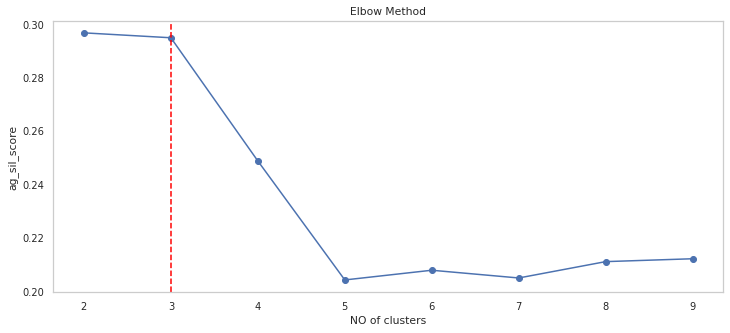

In [ ]:
#finding the optimum no of clusters using elbow method
plt.subplots(figsize=(12,5))
plt.plot(n_clusters,ag_sil_score,marker='o')
plt.title('Elbow Method')
plt.xlabel('NO of clusters')
plt.ylabel('ag_sil_score')
plt.axvline(3, ls="--", c="red")
plt.grid()
plt.show()

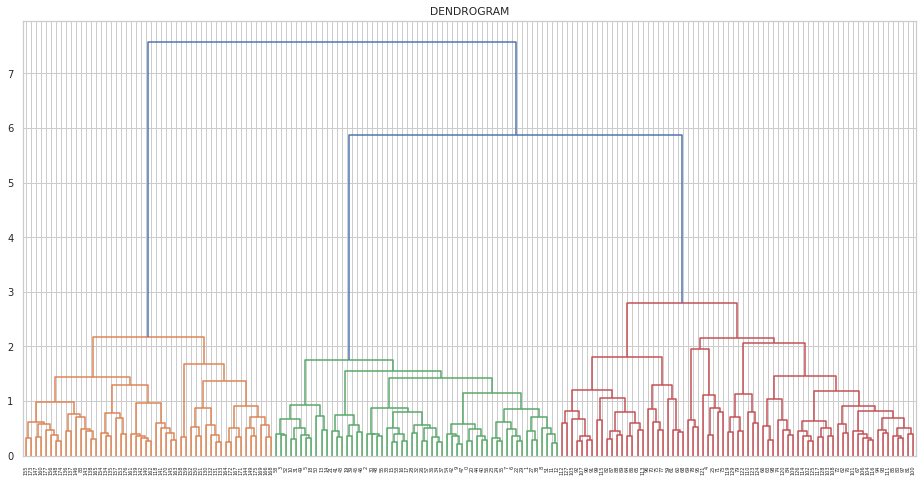

In [ ]:
# Plotting a dendogram
import scipy.cluster.hierarchy as sch
dendrogram= sch.dendrogram(sch.linkage(df3,method='ward'))
plt.title("DENDROGRAM")
plt.show()

In [ ]:
# To fit the model
ag = AgglomerativeClustering(n_clusters=3).fit(df3)
ag_clustered = df3.copy()
ag_clustered.loc[:,'Cluster'] = ag.labels_ # append labels to points
ag_clust_sizes = ag_clustered.groupby('Cluster').size().to_frame()
ag_clust_sizes.columns = ["Agglomerative Clustering size"]
ag_clust_sizes

,Agglomerative Clustering size
Cluster,
0,71
1,50
2,57


Density Based Spatial Clustering(DBScan)

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
df4=df.copy()

In [ ]:
dbscan=DBSCAN(algorithm ='auto',eps=2.12,leaf_size=30,metric='euclidean',metric_params=None, min_samples=5,n_jobs=1, p=None)

In [ ]:
# Fitting the model
dbscan.fit(X_train_std)

DBSCAN(eps=2.12, n_jobs=1)

In [ ]:
#View training predictions
pred_train_y = dbscan.fit_predict(X_train_std)
pred_train_y

array([ 1,  0, -1,  0, -1,  0, -1, -1,  1,  0, -1,  1,  0, -1,  0,  2,  2,
        1, -1,  2, -1,  2,  0,  1,  2, -1,  1, -1,  1, -1,  0, -1, -1,  0,
       -1,  0,  0,  2,  0,  0,  0,  2, -1,  0, -1, -1,  1,  2,  0,  2, -1,
       -1,  2,  0, -1,  0,  0,  1,  0,  0,  0,  2,  1,  0,  2,  2, -1, -1,
       -1, -1,  0,  1,  1, -1,  0,  0,  2, -1,  0,  0,  0, -1,  0,  2, -1,
       -1,  0,  0, -1,  1, -1,  1,  2, -1,  1,  0,  1,  2, -1,  0, -1,  2,
        0, -1,  1,  0, -1,  0, -1, -1,  1,  0])

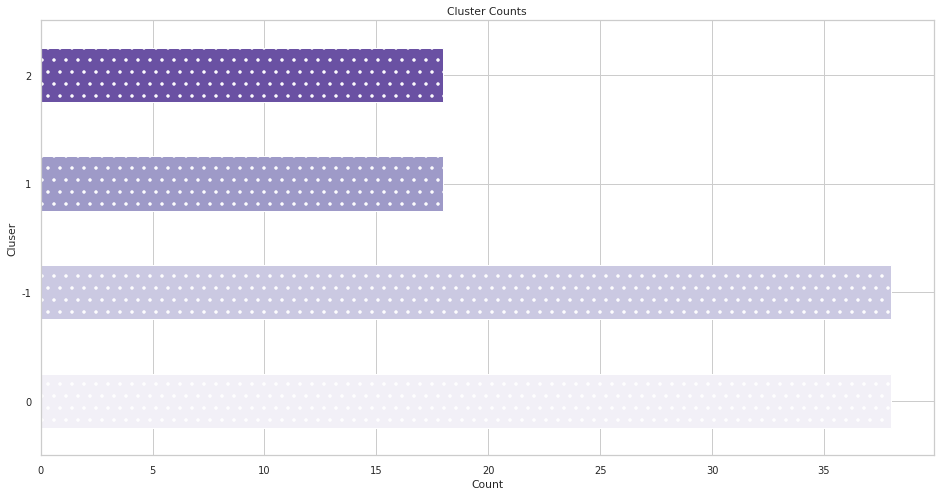

In [ ]:
# Plot Cluster Counts 
target_counts = pd.Series(pred_train_y).value_counts()
target_counts.plot.barh(color=['#f2f0f7','#cbc9e2','#9e9ac8','#6a51a3'], 
                        edgecolor='white',hatch='.');
plt.title('Cluster Counts')
plt.xlabel('Count')
plt.ylabel('Cluser');

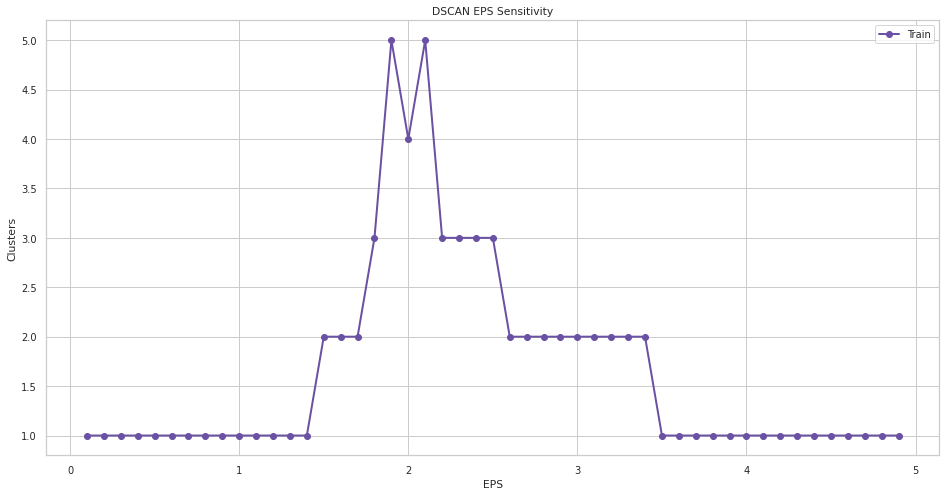

In [ ]:
#EPS Sensitivity
# Define paraameter range and score lists
eps_range = np.arange(0, 5,0.1)[1:]
clusters = []

# Train a knn_model for every neighbour value in our list
for i in eps_range:
    dbscan=DBSCAN(eps = i).fit(X_train,y_train)
    clusters.append(len((np.unique(dbscan.fit_predict(X_train_std)))))

# Plot our results
plt.plot(eps_range,clusters,label="Train",linewidth=2, marker='o',color='#6A51A3') 
plt.legend()
plt.title('DSCAN EPS Sensitivity')
plt.xlabel('EPS')
plt.ylabel('Clusters');

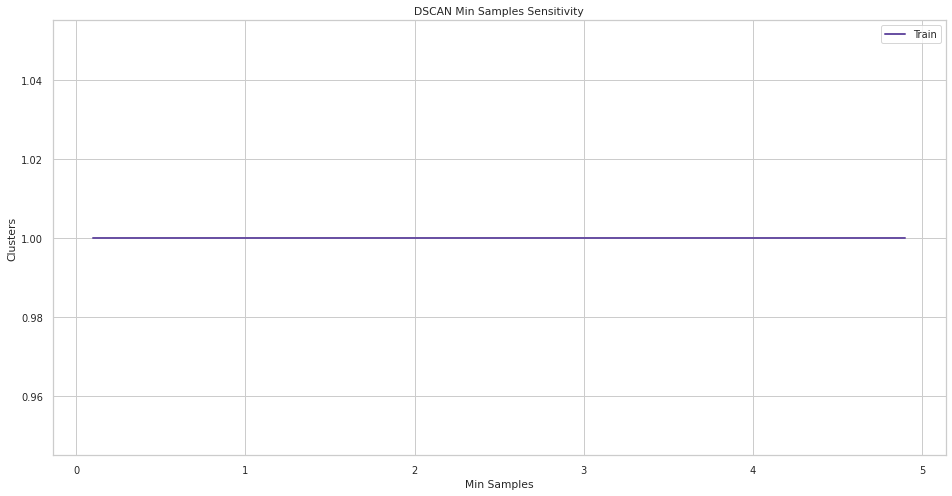

In [ ]:
#Min samples Sensitivity
# Define paraameter range and score lists
min_samples_range = np.arange(0, 5,0.1)[1:]
clusters = []

# Train a knn_model for every neighbour value in our list
for i in min_samples_range:
    clusters.append(len((np.unique(dbscan.fit_predict(X_train_std)))))

# Plot our results
plt.plot(min_samples_range, clusters, label="Train", linewidth=2, color='#6A51A3')
plt.legend()
plt.title('DSCAN Min Samples Sensitivity')
plt.xlabel('Min Samples')
plt.ylabel('Clusters');

In [ ]:
# the straight line means clustering algorithm is not sensitive
#to changes in the minimum samples parameter. In other words, 
#the clustering results are stable across a range of minimum sample values.
#In such cases, it may be difficult to identify meaningful clusters 
#using the DBSCAN algorithm, and it may be necessary to explore 
#other clustering algorithms or data analysis techniques to gain 
#insights into the structure of the data.

In [ ]:
# implementing principal component analysis to perform dimensionality reduction
# Before performing PCA, its good to ge the dataframe standardized
from sklearn import preprocessing
df5=df.copy()
scaler = preprocessing.StandardScaler().fit(df5)
df5 = scaler.transform(df5)

In [ ]:
from sklearn.decomposition import PCA
# Initializing an instance of PCA class
pc = PCA() 
# To apply PCA upon the predictor variables
results = pc.fit(df5) 
# getting an array of latent variables
Z = results.transform(df5) 

In [ ]:
data_rescaled = scaler.fit_transform(df5)
pca = PCA().fit(data_rescaled)

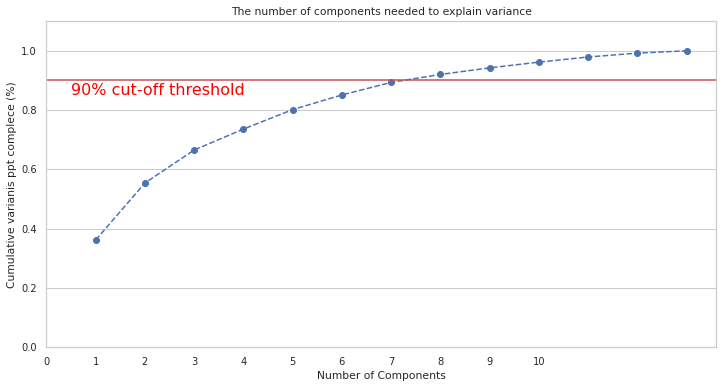

In [ ]:
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 14, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) 
plt.ylabel('Cumulative varianis ppt complece (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5, 0.85, '90% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [ ]:
#By examining the above figure, we can conclude that first 
#6 variables contain most of the information.
pca_r = PCA(7)
pca_r_result = pca_r.fit_transform(data_rescaled)
# To put the component (PCA coefficients) into a data frame
# The below is the coefficient matrix.
pd.DataFrame(pca.components_) 

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.144329,-0.245188,-0.002051,-0.239320,0.141992,0.394661,0.422934,-0.298533,0.313429,-0.088617,0.296715,0.376167,0.286752
1,-0.483652,-0.224931,-0.316069,0.010591,-0.299634,-0.065040,0.003360,-0.028779,-0.039302,-0.529996,0.279235,0.164496,-0.364903
2,-0.207383,0.089013,0.626224,0.612080,0.130757,0.146179,0.150682,0.170368,0.149454,-0.137306,0.085222,0.166005,-0.126746
3,-0.017856,0.536890,-0.214176,0.060859,-0.351797,0.198068,0.152295,-0.203301,0.399057,0.065926,-0.427771,0.184121,-0.232071
4,-0.265664,0.035214,-0.143025,0.066103,0.727049,-0.149318,-0.109026,-0.500703,0.136860,-0.076437,-0.173615,-0.101161,-0.157869
5,-0.213539,-0.536814,-0.154475,0.100825,-0.038144,0.084122,0.018920,0.258594,0.533795,0.418644,-0.105983,-0.265851,-0.119726
6,-0.056396,0.420524,-0.149171,-0.286969,0.322883,-0.027925,-0.060685,0.595447,0.372139,-0.227712,0.232076,-0.044764,0.076805
7,-0.396139,-0.065827,0.170260,-0.427970,0.156361,0.405934,0.187245,0.233285,-0.368227,0.033797,-0.436624,0.078108,-0.120023
8,0.508619,-0.075283,-0.307694,0.200449,0.271403,0.286035,0.049578,0.195501,-0.209145,0.056218,0.085828,0.137227,-0.575786
9,0.211605,-0.309080,-0.027125,0.052799,0.067870,-0.320131,-0.163151,0.215535,0.134184,-0.290775,-0.522399,0.523706,0.162116


In [ ]:
# Putting names on columns manually as column named 0, 1 and so on made less sense.
pd.DataFrame(pca_r_result[:,:6], columns=list(
[u'Alcohol', u'Malic_Acid', u'Ash', u'Ash_Alcanity', u'Magnesium', u'Total_Phenols'])).head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520
5,3.050254,-2.122401,-0.629396,-0.515637,-0.632019,0.123431
6,2.449090,-1.174850,-0.977095,-0.065831,-1.027762,-0.620121
7,2.059437,-1.608963,0.146282,-1.192608,0.076903,-1.439806
8,2.510874,-0.918071,-1.770969,0.056270,-0.892257,-0.129181
9,2.753628,-0.789438,-0.984247,0.349382,-0.468553,0.163392


In [ ]:
# now we are applying each algoritham
#KMeans
dfvar = pd.DataFrame(pca_r_result[:,:6], columns=list(
[u'Alcohol', u'Malic_Acid', u'Ash', u'Ash_Alcanity', u'Magnesium', u'Total_Phenols'])) #Assigning the dataframe to a var named dfvar
KM_3_clusters = KMeans(n_clusters=3 , init='k-means++').fit(dfvar) # initialise and fit K-Means model

KM3_clustered = dfvar.copy()
KM3_clustered.loc[:,'Cluster'] = KM_3_clusters.labels_ # append labels to points
     

In [ ]:
KM_clust_sizes = KM3_clustered.groupby('Cluster').size().to_frame()
KM_clust_sizes.columns = ["KM_size = 3 Size After PCA"]
KM_clust_sizes

,KM_size = 3 Size After PCA
Cluster,
0,51
1,62
2,65


In [ ]:
# Running Agglomerative Clustering
dfvar = pd.DataFrame(pca_r_result[:,:6], columns=list(
[u'Alcohol', u'Malic_Acid', u'Ash', u'Ash_Alcanity', u'Magnesium', u'Total_Phenols']))


no_of_clusters = []
n_clusters = range(2, 10) # Range is arbitrarily chosen
ag_sil_score = [] # silouette scores

for p in n_clusters:
    ag = AgglomerativeClustering(n_clusters=p).fit(dfvar)
    no_of_clusters.append((len(np.unique(ag.labels_))))
    ag_sil_score.append(silhouette_score(dfvar, ag.labels_))
    
results = pd.DataFrame([n_clusters, no_of_clusters, ag_sil_score], index=['n_clusters','clusters', 'sil_score']).T
results.sort_values(by='sil_score', ascending=False).head() 
     

,n_clusters,clusters,sil_score
1,3.0,3.0,0.337316
0,2.0,2.0,0.313808
3,5.0,5.0,0.294414
2,4.0,4.0,0.282077
5,7.0,7.0,0.262158


In [ ]:
# To fit the model
ag = AgglomerativeClustering(n_clusters=3).fit(dfvar)
ag_clustered = dfvar.copy()
ag_clustered.loc[:,'Cluster'] = ag.labels_ # append labels to points
ag_clust_sizes = ag_clustered.groupby('Cluster').size().to_frame()
ag_clust_sizes.columns = ["Agglomerative Clustering size after PCA"]
ag_clust_sizes

,Agglomerative Clustering size after PCA
Cluster,
0,64
1,49
2,65


In [ ]:
clustersPCA = pd.concat([KM_clust_sizes, ag_clust_sizes],axis=1, sort=False)
clustersPCA

,KM_size = 3 Size After PCA,Agglomerative Clustering size after PCA
Cluster,,
0,51,64
1,62,49
2,65,65


In [ ]:
# applying PCA to the data has likely reduced the dimensionality of the
#data and changed the distribution of the data points, which affected 
#the clustering results obtained using the k-means and agglomerative algorithm.